In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix

In [4]:
(x_train_data, t_train_data), (x_test_data, t_test_data) = fashion_mnist.load_data()
print(x_train_data.shape, t_train_data.shape)
print(x_test_data.shape, t_test_data.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


<function matplotlib.pyplot.show(close=None, block=None)>

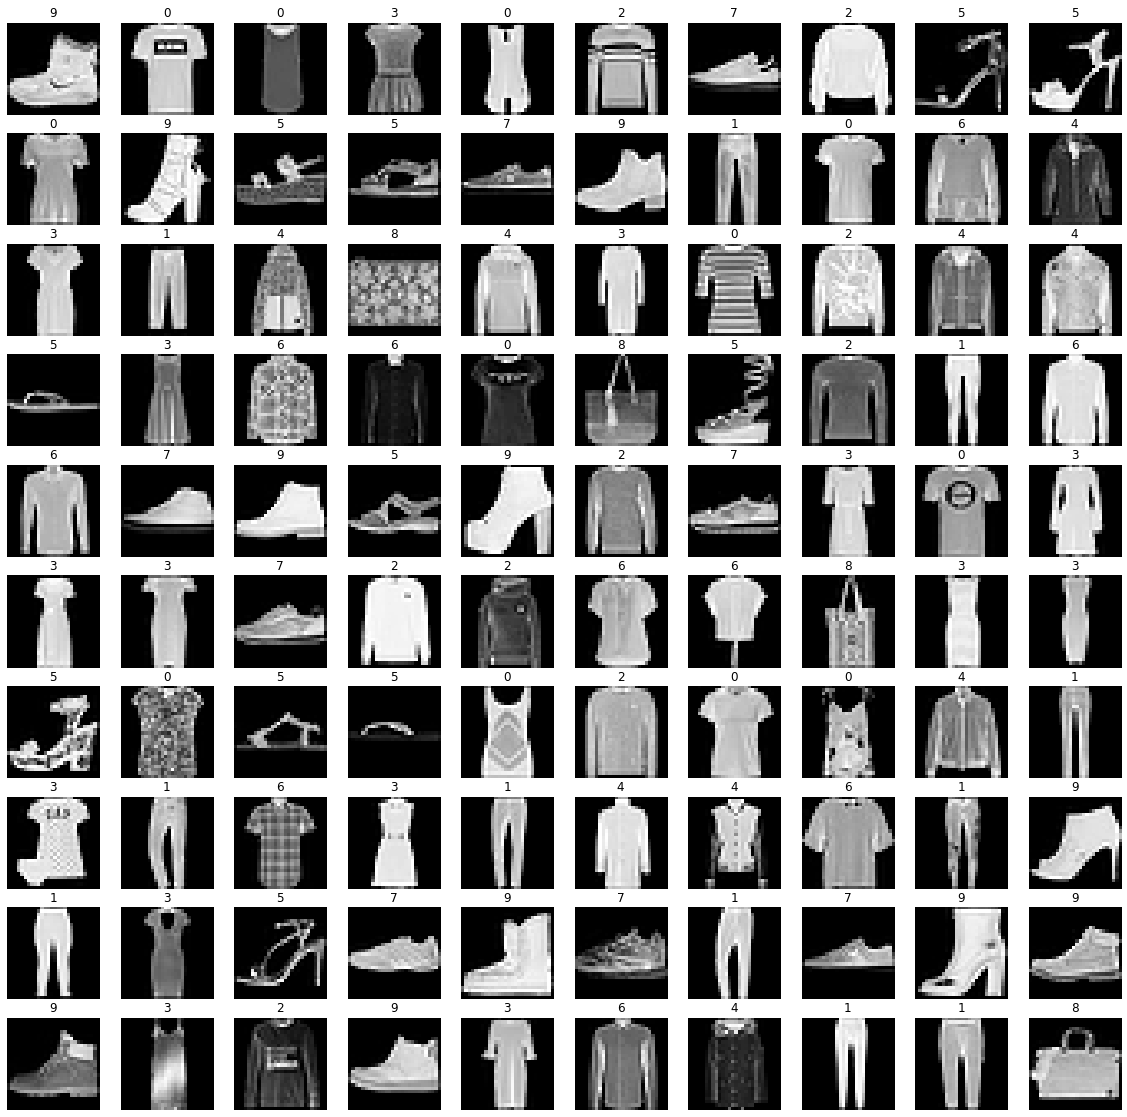

In [8]:
plt.figure(figsize=(20, 20))
for index in range(100):
    plt.subplot(10, 10, index+1)
    plt.imshow(x_train_data[index], cmap='gray')
    plt.axis('off')
    plt.title(str(t_train_data[index]))
plt.show

In [5]:
# image data 정규화 작업(overflow 방지)
x_train = (x_train_data - 0.0) / (255.0 - 0.0)
x_test = (x_test_data - 0.0) / (255.0 - 0.0)

In [6]:
# one hot encoding
t_train = tf.keras.utils.to_categorical(t_train_data, num_classes=10)
t_test = tf.keras.utils.to_categorical(t_test_data, num_classes=10)

In [7]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [9]:
hist = model.fit(x_train, t_train, epochs=100, validation_split=0.3)

Epoch 1/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.8110 - accuracy: 0.7418 - val_loss: 0.5847 - val_accuracy: 0.8015
Epoch 2/100
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5231 - accuracy: 0.8252 - val_loss: 0.4938 - val_accuracy: 0.8326
Epoch 3/100
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4700 - accuracy: 0.8406 - val_loss: 0.4641 - val_accuracy: 0.8422
Epoch 4/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.4408 - accuracy: 0.8488 - val_loss: 0.4386 - val_accuracy: 0.8493
Epoch 5/100
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4203 - accuracy: 0.8565 - val_loss: 0.4261 - val_accuracy: 0.8518
Epoch 6/100
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4047 - accuracy: 0.8615 - val_loss: 0.4130 - val_accuracy: 0.8583
Epoch 7/100
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3926 - accuracy: 0.8650 - val_loss: 0.4185 - val_ac

In [10]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3653 - accuracy: 0.8803


[0.36533892154693604, 0.880299985408783]

In [11]:
predictions = model.predict(x_test)

313/313 [==============================] - 0s 768us/step


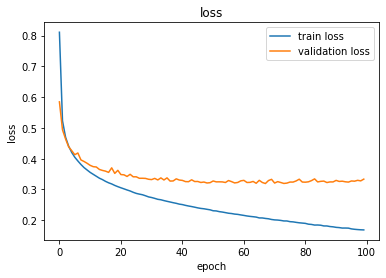

In [12]:
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')
plt.show()

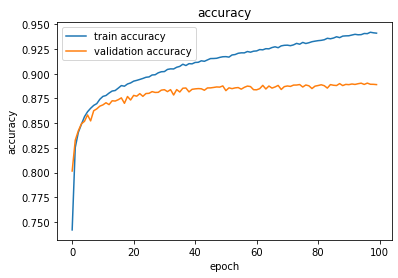

In [13]:
plt.title('accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')
plt.show()

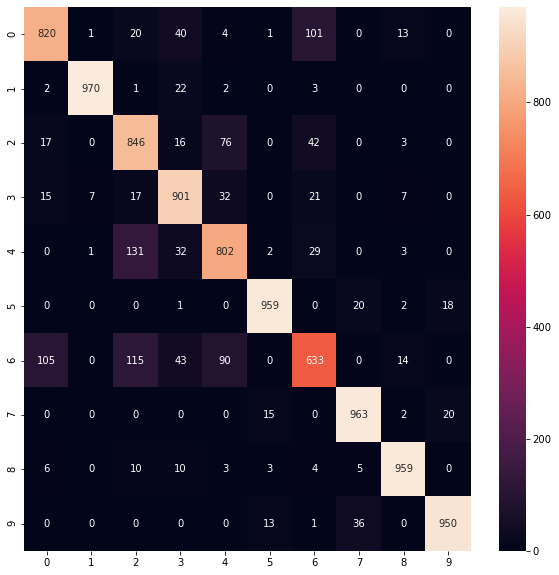

In [14]:
plt.figure(figsize=(10, 10))
cm = confusion_matrix(np.argmax(t_test, axis=-1),
                      np.argmax(predictions, axis=-1))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()